In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE)
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
plt.figure(figsize=(15,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [6]:
len(dataset)

68

In [7]:
#in the next section we'll do train test split
#we'll keep 
#80% => training
#20% => testing, 10% => validation, 10% => test.
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_dataset=dataset.take(54)
len(train_dataset)

54

In [9]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [10]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_dataset = test_dataset.take(6)
len(val_dataset)

6

In [12]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [13]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if(shuffle):
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_dataset = ds.take(train_size)
    
    val_dataset = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_dataset, test_dataset, val_dataset

In [14]:
train_dataset, test_dataset, val_dataset = get_dataset_partitions_tf(dataset)

In [15]:
len(train_dataset)

54

In [16]:
len(val_dataset)

6

In [17]:
len(test_dataset)

8

In [18]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)  
])

In [24]:
data_augmentation=  tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),  
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax') 
 ])

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_dataset
)

Epoch 1/50
54/54 [==============================] - 187s 3s/step - loss: 0.9156 - accuracy: 0.4751 - val_loss: 0.8511 - val_accuracy: 0.6927
Epoch 2/50
54/54 [==============================] - 148s 3s/step - loss: 0.6795 - accuracy: 0.6927 - val_loss: 0.3990 - val_accuracy: 0.8073
Epoch 3/50
54/54 [==============================] - 146s 3s/step - loss: 0.3286 - accuracy: 0.8773 - val_loss: 0.1445 - val_accuracy: 0.9531
Epoch 4/50
54/54 [==============================] - 140s 3s/step - loss: 0.1996 - accuracy: 0.9184 - val_loss: 0.1091 - val_accuracy: 0.9583
Epoch 5/50
54/54 [==============================] - 139s 3s/step - loss: 0.1170 - accuracy: 0.9560 - val_loss: 0.5245 - val_accuracy: 0.8125
Epoch 6/50
54/54 [==============================] - 138s 3s/step - loss: 0.3826 - accuracy: 0.8420 - val_loss: 0.7797 - val_accuracy: 0.6198
Epoch 7/50
54/54 [==============================] - 134s 2s/step - loss: 0.5198 - accuracy: 0.7963 - val_loss: 0.3175 - val_accuracy: 0.9062
Epoch 8/50
54

54/54 [==============================] - 192s 4s/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0181 - val_accuracy: 0.9896
Epoch 42/50
54/54 [==============================] - 178s 3s/step - loss: 0.0202 - accuracy: 0.9925 - val_loss: 0.0550 - val_accuracy: 0.9844
Epoch 43/50
54/54 [==============================] - 174s 3s/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0488 - val_accuracy: 0.9792
Epoch 44/50
54/54 [==============================] - 167s 3s/step - loss: 0.1475 - accuracy: 0.9439 - val_loss: 0.1184 - val_accuracy: 0.9427
Epoch 45/50
54/54 [==============================] - 173s 3s/step - loss: 0.0512 - accuracy: 0.9815 - val_loss: 0.0505 - val_accuracy: 0.9688
Epoch 46/50
54/54 [==============================] - 167s 3s/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0661 - val_accuracy: 0.9688
Epoch 47/50
54/54 [==============================] - 175s 3s/step - loss: 0.0154 - accuracy: 0.9931 - val_loss: 0.0961 - val_accuracy: 0.9740
Epoch 48/50
54/54 

In [31]:
scores = model.evaluate(test_dataset)

8/8 [==============================] - 19s 834ms/step - loss: 0.0410 - accuracy: 0.9871


In [32]:
history


In [33]:
print(history.paramsa)

AttributeError: 'History' object has no attribute 'paramsa'

In [34]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 54}


In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [67]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,2)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

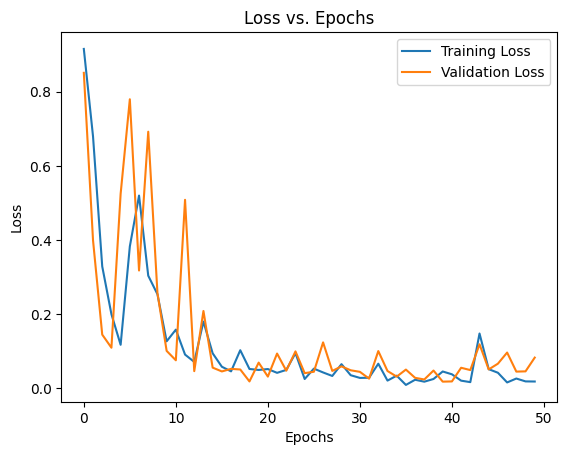

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

In [90]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [101]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 5s 5s/step
predicted label: Potato___Early_blight


In [102]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [110]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Accuracy: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 59ms/step


In [111]:
confidences = []
for images, labels in test_dataset:
    predictions = model.predict(images)
    for i in range(len(predictions)):
        predicted_class = np.argmax(predictions[i])
        actual_class = labels[i].numpy()
        confidence = predictions[i][predicted_class] * 100
        confidences.append(confidence)
        
plt.hist(confidences, bins=20)
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')
plt.show()

1/1 [==============================] - 1s 697ms/step


In [113]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [114]:
model.save("../potatoes.h5")